In [1]:
import pandas as pd
import jsonlines as jl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mcm

In [12]:
T=0.5
n_iters = 10000
method = "L1"

file_name = f"./experimental_MCMC_results/Livingston_MCMC_discrep_{method}_lenburst_1_iters_{n_iters}_T_{T}_id_66003712.jsonl"
file_name = f"./experimental_MCMC_results/Ontario_MCMC_discrep_{method}_lenburst_1_iters_{n_iters}_T_{T}_id_66003712.jsonl"

In [13]:
disc_array = []
disc_steps = []
with jl.open(file_name, "r") as f:
    initial_step = f.read()
    initial_prop = np.array(initial_step["weights"])
    initial_prop = initial_prop / np.sum(initial_prop)
    disc_steps.append(0)
    disc_array.append((initial_prop-initial_prop)/initial_prop)
    for line in f:
        disc_steps.append(line["step"])
        line_disc = np.array(line["weights"])
        line_disc = line_disc / np.sum(line_disc)
        disc_array.append((line_disc-initial_prop)/initial_prop)

disc_array_np = np.array(disc_array).T
disc_array_np.shape

(21, 2955)

In [14]:
color_list = mcm.get_cmap("viridis")(np.linspace(0, 1, disc_array_np.shape[0]))

/tmp/ipykernel_1879001/3622546160.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_list = mcm.get_cmap("viridis")(np.linspace(0, 1, disc_array_np.shape[0]))


In [15]:
disc_array_np

array([[ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
         1.97644549e-02,  1.97542585e-02,  2.04293743e-02],
       [ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
         1.87685839e-02,  1.94326255e-02,  1.94224326e-02],
       [ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
         3.68135735e-02,  3.68032067e-02,  3.67928401e-02],
       ...,
       [ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
        -1.31665524e-02, -1.31764195e-02, -1.31862863e-02],
       [ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
        -4.01849437e-02, -4.02738961e-02, -4.02834921e-02],
       [ 0.00000000e+00, -1.99994000e-05, -2.99988000e-05, ...,
        -6.18631033e-02, -6.18724834e-02, -6.18818634e-02]],
      shape=(21, 2955))

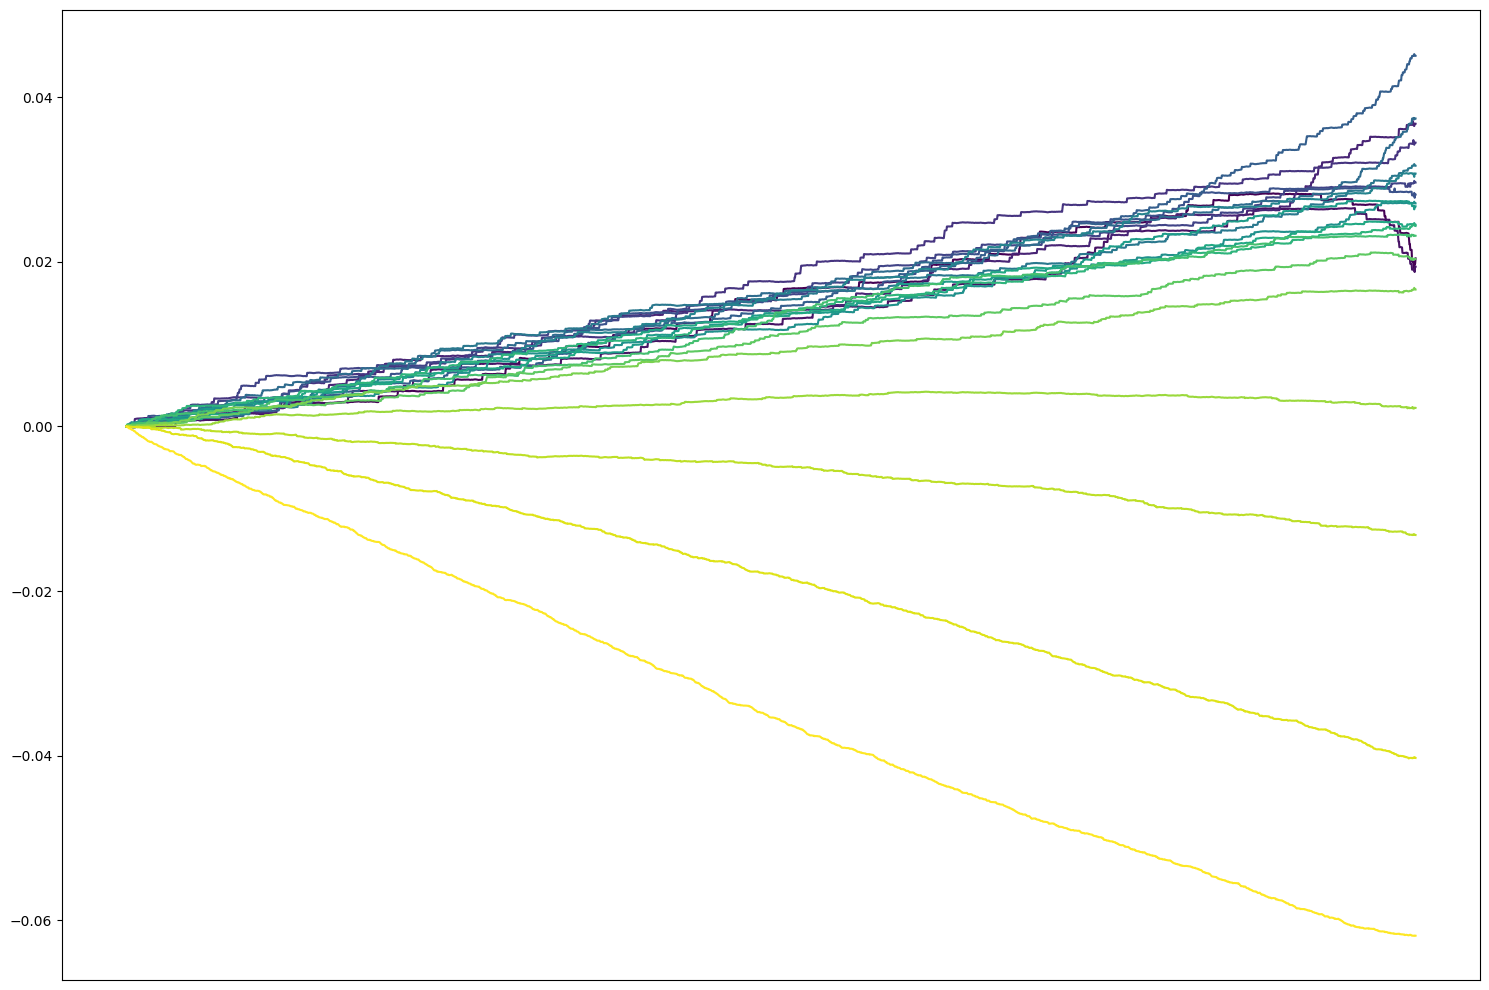

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

for i, row in enumerate(disc_array_np):
    ax.plot(row, color = color_list[i], label=f"T={row[0]}")
    
ax.set_xticks([])
plt.tight_layout()
plt.savefig(f"./figures/{'Ontario' if disc_array_np.shape[0] == 21 else 'Livingston'}_(wt[i]-m[i])_div_(m[i])_for_threshold_{T}_method_{method}.png") 
plt.show()

In [17]:
disc_log_array = []
disc_log_steps = []
with jl.open(file_name, "r") as f:
    initial_log_step = f.read()
    initial_log_prop = np.array(initial_log_step["weights"])
    initial_log_power = np.array(initial_log_step["power"])
    initial_log_prop = initial_log_prop / np.sum(initial_log_prop)
    disc_log_steps.append(0)
    disc_log_array.append(np.log(initial_log_power/initial_log_prop))
    for line_log in f:
        disc_log_steps.append(line_log["step"])
        line_log_disc = np.array(line_log["power"])
        # line_log_disc = line_log_disc / np.sum(line_log_disc)
        disc_log_array.append(np.log(line_log_disc/initial_log_prop))
        
disc_log_array_np = np.array(disc_log_array).T
disc_log_array_np.shape

(21, 2955)

In [18]:
disc_log_array_np 

array([[-3.51340430e-02, -3.50924763e-02, -3.50957242e-02, ...,
         3.81697982e-04, -2.51016708e-04,  9.63143657e-04],
       [-3.48033645e-02, -3.47625590e-02, -3.46297618e-02, ...,
        -1.06053727e-04,  7.29422302e-04,  5.94445701e-04],
       [-3.28703733e-02, -3.29079732e-02, -3.28451163e-02, ...,
         3.18940035e-04,  2.34039639e-04,  7.10777408e-05],
       ...,
       [ 9.24012059e-03,  9.22905856e-03,  9.22581068e-03, ...,
        -1.22218906e-04, -4.14365817e-05, -7.35599874e-05],
       [ 3.88678696e-02,  3.88583637e-02,  3.88402388e-02, ...,
         1.25905672e-04, -1.75388664e-05,  2.65914385e-05],
       [ 7.11751198e-02,  7.11577040e-02,  7.11587457e-02, ...,
         2.75582300e-05,  7.79789775e-07, -2.81382061e-05]],
      shape=(21, 2955))

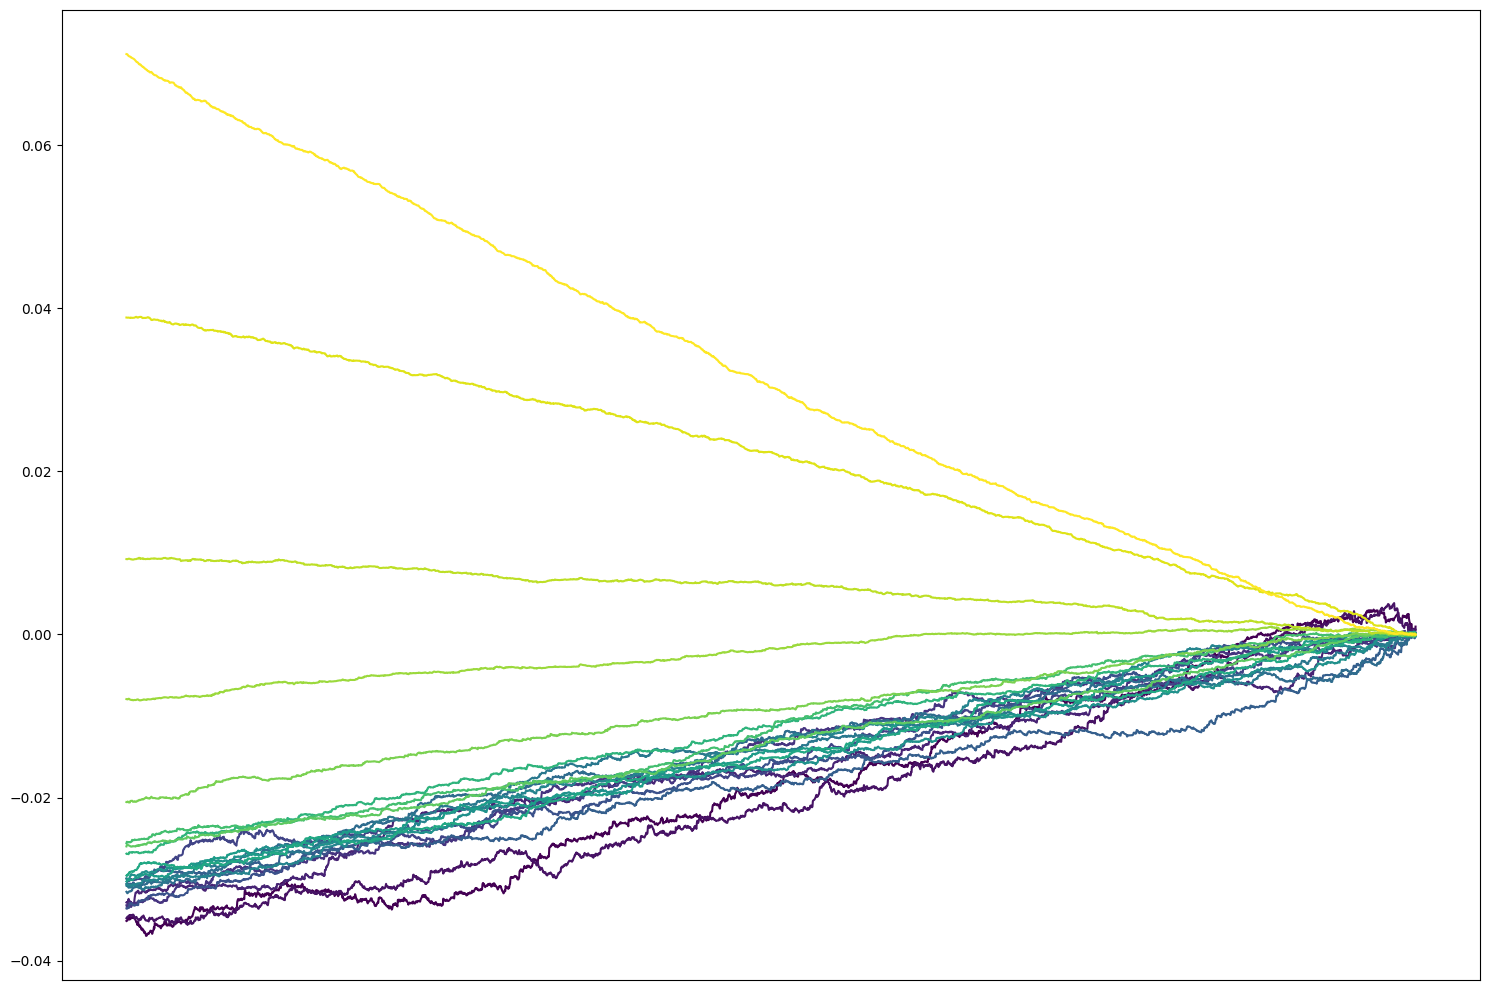

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

for i, row in enumerate(disc_log_array_np):
    ax.plot(row, color = color_list[i], label=f"T={row[0]}")
    
ax.set_xticks([])
plt.tight_layout()
plt.savefig(f"./figures/{'Ontario' if disc_array_np.shape[0] == 21 else 'Livingston'}_log(p[i]_div_m[i])_for_threshold_{T}_method_{method}.png") 
plt.show()